In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
% pylab inline

Populating the interactive namespace from numpy and matplotlib


* Download tables from HEASARC by using [browse_extract_wget.pl](https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl) version 2a

In [2]:
### Uncomment below for downloading: 
! wget -q https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl \
    -O browse_extract_wget.pl

! perl ./browse_extract_wget.pl \
table=xmmmaster \
position='0.,0.' \
radius=100000 \
coordinates=Galactic \
fields=All \
format=Text \
resultmax=100000 \
outfile=xmm-obs.csv

In [3]:
# Final observation file size about 1.7 Mbytes (17k+ rows)
! wc xmm-obs.csv

   17765   894081 17103895 xmm-obs.csv


In [4]:
# It is written in txt format with '|' separator
! head -6 xmm-obs.csv



Results from xmmmaster
Coordinate system:galactic
|obsid     |status   |name                    |_l       |_b       |time               |duration|pi_lname            |pi_fname        |public_date|data_in_heasarc|bii      |class|distribution_date|end_time           |estimated_exposure|lii      |mos1_mode                                                                          |mos1_num|mos1_time|mos2_mode                                                               |mos2_num|mos2_time|odf_date           |om_mode                                                                                                                             |om_num|om_time|pi_title|pn_mode                                   |pn_num|pn_time|pno   |pps_flag|process_date       |process_status|rgs1_mode                         |rgs1_num|rgs1_time|rgs2_mode       |rgs2_num|rgs2_time|sas_version|scheduled_duration|subject_category                                                                        |xmm_revoluti

In [5]:
# converting to pandas dataset
data = pd.read_csv('xmm-obs.csv', sep='|', header=0, skiprows=4)
data.head()

,Unnamed: 0,obsid,status,name,_l,_b,time,duration,pi_lname,pi_fname,...,rgs1_time,rgs2_mode,rgs2_num,rgs2_time,sas_version,scheduled_duration,subject_category,xmm_revolution,_offset,Unnamed: 47
0,NaN,694641101,archived,CMZ-1,0.02002,0.04996,2012-09-24T10:16:44,41918,Terrier,Regis,...,41915,SES (1),1,41910,9.0,40039,null ...,2343,3.2294,NaN
1,NaN,302881901,observed,GC-2,359.94823,-0.04356,2005-09-14T20:00:23,null,null,null,...,null,null,null,null,null,4935,null ...,1056,4.0595,NaN
2,NaN,302883301,observed,GC-2,359.94823,-0.04356,2006-03-29T04:10:23,null,null,null,...,null,null,null,null,null,4935,null ...,1154,4.0595,NaN
3,NaN,504940201,archived,GC-2,359.94822,-0.04355,2007-09-06T10:05:50,12982,Wijnands,Rudy,...,12982,SES (1),1,12965,9.0,11119,"White Dwarf Binaries, Neutron Star Binaries, C...",1418,4.0596,NaN
4,NaN,302884001,archived,GC-2,359.94822,-0.04355,2006-09-08T16:56:48,6862,Wijnands,Rudy,...,6862,SES (1),1,6861,9.0,4985,null ...,1236,4.0596,NaN


In [6]:
# Brief descrption of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17760 entries, 0 to 17759
Data columns (total 48 columns):
Unnamed: 0                                                                                                                              0 non-null float64
obsid                                                                                                                                   17760 non-null int64
status                                                                                                                                  17760 non-null object
name                                                                                                                                    17760 non-null object
_l                                                                                                                                      17760 non-null object
_b                                                                                                       

In [7]:
# Note that are several proposal categories already included to HEASARC data
data['subject_category                                                                        '].unique()                                                              

array([ 'null                                                                                    ',
       'White Dwarf Binaries, Neutron Star Binaries, Cataclysmic Variables, ULXs and Black Holes',
       'X-ray Background and Surveys                                                            ',
       'Supernovae, Supernova Remnants, Diffuse (Galactic) Emission and Isolated Neutron Stars  ',
       'Galaxies and Galactic Surveys                                                           ',
       'Stars, White Dwarfs and Solar System                                                    ',
       'AGN, QSOs and BL-Lacs                                                                   ',
       'Groups of Galaxies, Clusters of Galaxies and Superclusters                              ',
       'Cosmology, Extragalactic Deep Fields and Area Surveys                                   '], dtype=object)

In [8]:
# Columns 0 and 47 do not contain any relevant information and are removed:
data.drop([data.columns[0], data.columns[-1]], axis=1, inplace=True)
data.head()

,obsid,status,name,_l,_b,time,duration,pi_lname,pi_fname,public_date,...,rgs1_num,rgs1_time,rgs2_mode,rgs2_num,rgs2_time,sas_version,scheduled_duration,subject_category,xmm_revolution,_offset
0,694641101,archived,CMZ-1,0.02002,0.04996,2012-09-24T10:16:44,41918,Terrier,Regis,2013-10-05,...,1,41915,SES (1),1,41910,9.0,40039,null ...,2343,3.2294
1,302881901,observed,GC-2,359.94823,-0.04356,2005-09-14T20:00:23,null,null,null,null,...,null,null,null,null,null,null,4935,null ...,1056,4.0595
2,302883301,observed,GC-2,359.94823,-0.04356,2006-03-29T04:10:23,null,null,null,null,...,null,null,null,null,null,null,4935,null ...,1154,4.0595
3,504940201,archived,GC-2,359.94822,-0.04355,2007-09-06T10:05:50,12982,Wijnands,Rudy,2008-11-13,...,1,12982,SES (1),1,12965,9.0,11119,"White Dwarf Binaries, Neutron Star Binaries, C...",1418,4.0596
4,302884001,archived,GC-2,359.94822,-0.04355,2006-09-08T16:56:48,6862,Wijnands,Rudy,2007-10-05,...,1,6862,SES (1),1,6861,9.0,4985,null ...,1236,4.0596


In [9]:
# also, we do not need rgs_* and om_* columns that correspond to instruments we do not use
# we also skip pi_ column that contain last and first name of the proposal PI
rgs_om_list = [i for i in data.columns \
               if i.startswith('rgs') or i.startswith('om_') or i.startswith('pi_')]
data.drop(rgs_om_list, axis=1, inplace=True)
data.head()

,obsid,status,name,_l,_b,time,duration,public_date,data_in_heasarc,bii,...,pn_time,pno,pps_flag,process_date,process_status,sas_version,scheduled_duration,subject_category,xmm_revolution,_offset
0,694641101,archived,CMZ-1,0.02002,0.04996,2012-09-24T10:16:44,41918,2013-10-05,Y,0.04996,...,40041,69464,Y,2012-12-26T04:15:50,delivered,9.0,40039,null ...,2343,3.2294
1,302881901,observed,GC-2,359.94823,-0.04356,2005-09-14T20:00:23,null,null,N,-0.04356,...,null,30288,null,null,null,null,4935,null ...,1056,4.0595
2,302883301,observed,GC-2,359.94823,-0.04356,2006-03-29T04:10:23,null,null,N,-0.04356,...,null,30288,null,null,null,null,4935,null ...,1154,4.0595
3,504940201,archived,GC-2,359.94822,-0.04355,2007-09-06T10:05:50,12982,2008-11-13,Y,-0.04355,...,11120,50494,Y,2012-12-24T02:54:14,delivered,9.0,11119,"White Dwarf Binaries, Neutron Star Binaries, C...",1418,4.0596
4,302884001,archived,GC-2,359.94822,-0.04355,2006-09-08T16:56:48,6862,2007-10-05,Y,-0.04355,...,4987,30288,Y,2012-12-23T16:22:46,delivered,9.0,4985,null ...,1236,4.0596


In [10]:
# Also, the data should be publicly available in HEASARC:
data = data[data['data_in_heasarc'] == data['data_in_heasarc'].unique()[0]]

In [11]:
for col in ['duration', 'mos1_time', 'mos2_time', 'pn_time', '_offset   ']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [12]:
data.describe()

,obsid,duration,class,mos1_time,mos2_time,pn_time,_offset
count,1.704400e+04,12981.000000,17044.000000,10695.000000,10714.000000,10811.000000,12979.000000
mean,2.526503e+09,33317.532856,7841.793182,30082.014867,30150.751353,28943.362409,5195.789309
std,3.735464e+09,32745.935833,2931.473569,27538.637116,27665.251791,27826.265452,2365.994693
min,1.101010e+05,9.000000,1000.000000,1037.000000,1025.000000,1025.000000,3.229400
25%,2.063151e+08,11622.000000,5175.000000,11670.000000,11674.000000,10306.000000,3765.656000
50%,6.524007e+08,22114.000000,9999.000000,21568.000000,21556.000000,19999.000000,5247.642600
75%,7.851106e+08,41413.000000,9999.000000,37385.000000,37427.500000,36019.500000,6971.023100
max,9.335900e+09,146400.000000,9999.000000,144357.000000,144426.000000,142802.000000,10697.446600


In [13]:
filtered_data = data[['obsid     ', 'mos1_time', 'mos2_time', 'pn_time', '_offset   ']]
filtered_data = filtered_data.dropna(axis=0, how='any')
filtered_data.head()

,obsid,mos1_time,mos2_time,pn_time,_offset
0,694641101,41622.0,41626.0,40041.0,3.2294
3,504940201,12683.0,12689.0,11120.0,4.0596
4,302884001,6572.0,6577.0,4987.0,4.0596
5,302882601,6810.0,6576.0,5145.0,4.0596
6,511000401,4365.0,4350.0,5058.0,4.0596


In [14]:
# group exposure by off-center angle _offset by making $10^\circ$ bins
dr = 10
filtered_data['raw_offset'] = filtered_data['_offset   '].apply(lambda x: math.floor(x/(60.0*dr))*dr)
filtered_data.head()

binned_time = filtered_data.groupby('raw_offset').agg(sum)[['mos1_time', 'mos2_time', 'pn_time']]

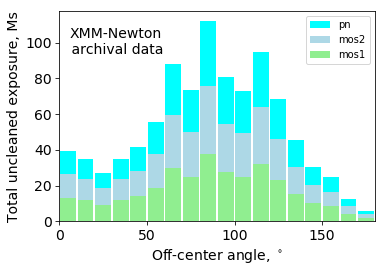

In [15]:
plt.xlim([0., 180.])
plt.bar(np.array(binned_time.index + 5), 1e-6*np.array(binned_time['mos1_time'] + binned_time['mos2_time'] + binned_time['pn_time']), width=9.0, color='cyan')
plt.bar(np.array(binned_time.index + 5), 1e-6*np.array(binned_time['mos1_time'] + binned_time['mos2_time']), width=9.0, color='lightblue')
plt.bar(np.array(binned_time.index + 5), 1e-6*np.array(binned_time['mos1_time']), width=9.0, color='lightgreen')
plt.legend(['pn', 'mos2', 'mos1'])
plt.xlabel('Off-center angle, ${}^\circ$', size=14)
plt.ylabel('Total uncleaned exposure, Ms', size=14)
plt.tick_params(axis ='both', which='major', length=4, labelsize =14, color='black')
plt.tick_params(axis ='both', which='minor', length=0)
plt.figtext(x=0.28, y=0.73, s='XMM-Newton\n archival data', ha='center', size=14, color='black')
plt.subplots_adjust(left=0.15, right=0.88, top=0.88, bottom=0.15)

plt.savefig("xmm-uncleaned-exposure.pdf", format="pdf", transparent=True,rasterized=True,dpi=300, pad_inches=1)